## Ingeniería de Características: Transformaciones de Variables (Core)

**Descripción:**

En esta actividad, aplicarás diversas técnicas de transformación de variables para mejorar la calidad de los datos en el dataset «House Prices – Advanced Regression Techniques» disponible en Kaggle. Aprenderás a realizar transformaciones logarítmicas, escalado y creación de variables polinómicas para mejorar el rendimiento de los modelos predictivos.

Enlace al dataset: [House prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)



**Objetivo:**

El objetivo es realizar transformaciones de las variables en el dataset para mejorar la distribución de los datos y su relación con la variable objetivo (el precio de las casas). Estas transformaciones son clave para mejorar la precisión de los modelos de regresión y reducir sesgos en los datos.



Instrucciones:

### 1. Carga de datos:
  - Descarga el dataset «House Prices» de Kaggle. Realiza una exploración inicial de las variables numéricas y categóricas, prestando especial atención a aquellas que están relacionadas con el tamaño de la casa, el número de habitaciones y la calidad general.
  - Revisa la distribución de la variable objetivo (precio de la casa) y observa si tiene algún sesgo.


In [145]:
# Librerias para carga y exploración de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df_train = pd.read_csv('../data/house_prices-advanced_regression_techniques/train.csv')
print(df_train.info())
df_train.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [147]:
#relleno los valores nulos encontrados en nuestro data_description
#Primero hecho por mi y optimizado por Claude AI
# Create a dictionary mapping columns to their fill values
fill_values = {
    'PoolQC': 'No Pool',
    'MiscFeature': 'None',
    'Alley': 'No alley access',
    'Fence': 'No Fence',
    'MasVnrType': 'Unknown',
    'FireplaceQu': 'No Fireplace',
    'GarageFinish': 'No Garage',
    'GarageType': 'No Garage',
    'GarageQual': 'No Garage',
    'GarageCond': 'No Garage',
    'BsmtFinType2': 'No Basement',
    'BsmtExposure': 'No Basement',
    'BsmtQual': 'No Basement',
    'BsmtCond': 'No Basement',
    'BsmtFinType1': 'No Basement'
}

# Apply all fill operations at once
df_train = df_train.fillna(fill_values)

In [148]:
#Calculamos los valores nulos 
#Codigo Hecho por el profesor Iair Linker
def calculate_na_statistics(df: pd.DataFrame):
    qsna = df.shape[0] - df.isnull().sum(axis=0)
    qna = df.isnull().sum(axis=0)
    ppna = np.round(100 * (df.isnull().sum(axis=0) / df.shape[0]), 2)
    aux = {'datos sin NAs en q': qsna, 'Na en q': qna, 'Na en %': ppna}
    na = pd.DataFrame(data=aux)
    return na.sort_values(by='Na en %', ascending=False)

null_values = calculate_na_statistics(df_train)
null_values

,datos sin NAs en q,Na en q,Na en %
LotFrontage,1201,259,17.74
GarageYrBlt,1379,81,5.55
MasVnrArea,1452,8,0.55
Electrical,1459,1,0.07
KitchenAbvGr,1460,0,0.00
...,...,...,...
ExterQual,1460,0,0.00
MasVnrType,1460,0,0.00
Exterior2nd,1460,0,0.00
Exterior1st,1460,0,0.00


In [149]:
# Columnas relacianadas con el tamano
size_related = ['GrLivArea', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']
# vemos los tipos de datos de size_related
df_train[size_related].dtypes


GrLivArea      int64
LotArea        int64
TotalBsmtSF    int64
1stFlrSF       int64
2ndFlrSF       int64
dtype: object

         GrLivArea        LotArea  TotalBsmtSF     1stFlrSF     2ndFlrSF
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000
mean   1515.463699   10516.828082  1057.429452  1162.626712   346.992466
std     525.480383    9981.264932   438.705324   386.587738   436.528436
min     334.000000    1300.000000     0.000000   334.000000     0.000000
25%    1129.500000    7553.500000   795.750000   882.000000     0.000000
50%    1464.000000    9478.500000   991.500000  1087.000000     0.000000
75%    1776.750000   11601.500000  1298.250000  1391.250000   728.000000
max    5642.000000  215245.000000  6110.000000  4692.000000  2065.000000


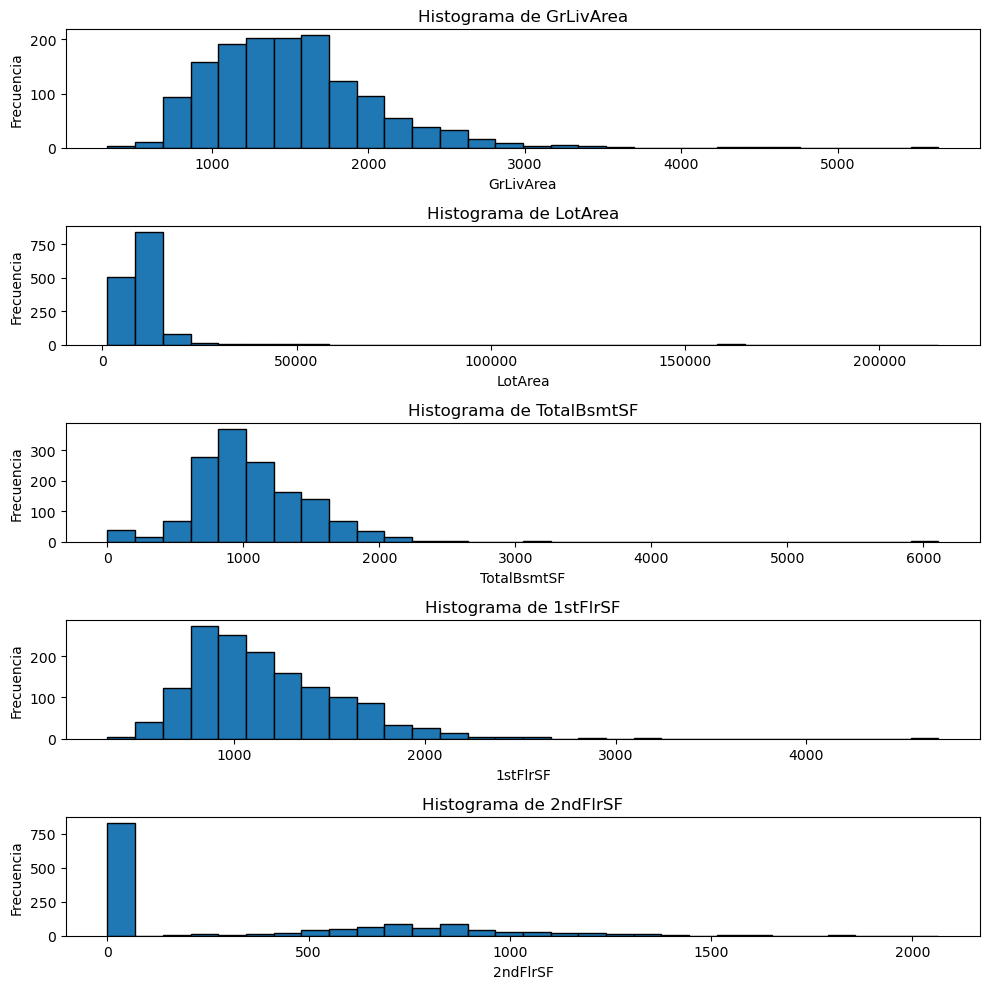

In [150]:

print(df_train[size_related].describe())

# Configuración del tamaño de la gráfica
plt.figure(figsize=(10, 10))

# Crear un histograma para cada columna numérica
for i, column in enumerate(size_related, 1):
    plt.subplot(len(size_related), 1, i)
    plt.hist(df_train[column].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [151]:
# Columnas relacianadas con la calidad
qual_related = ['OverallQual', 'KitchenQual', 'BsmtQual', 'ExterQual']
# vemos los tipos de datos de size_related
print(df_train[qual_related].dtypes)


OverallQual     int64
KitchenQual    object
BsmtQual       object
ExterQual      object
dtype: object


       OverallQual
count  1460.000000
mean      6.099315
std       1.382997
min       1.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      10.000000


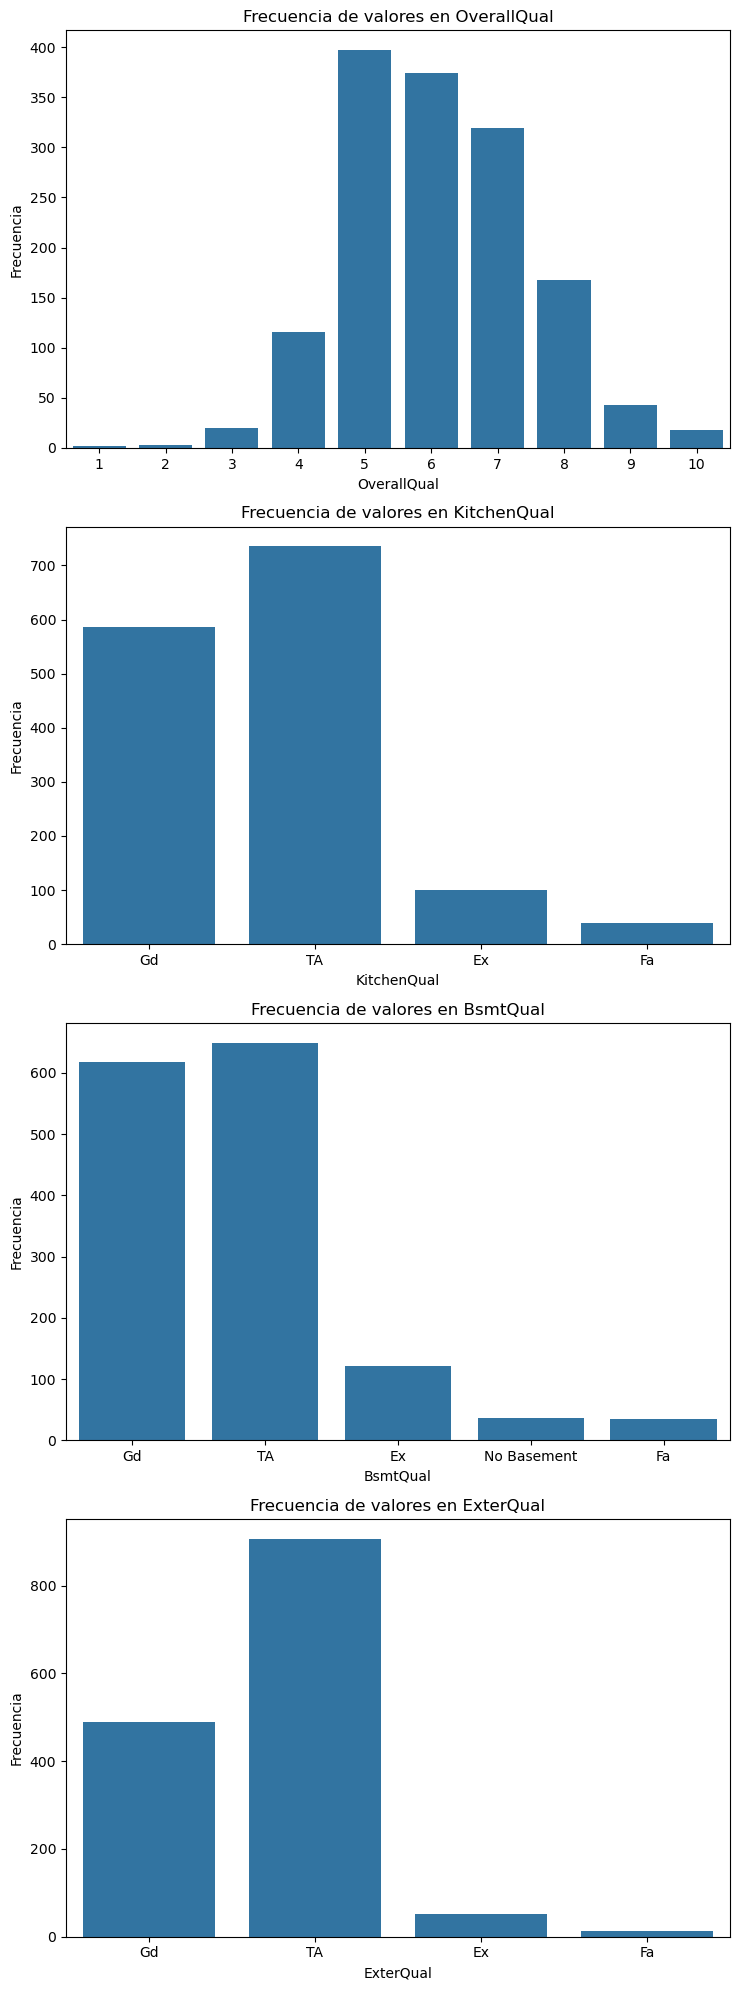

In [152]:

print(df_train[qual_related].describe())

# Configuración del tamaño de la gráfica
plt.figure(figsize=(7.5, 5 * len(qual_related)))
# Crear un gráfico de conteo para cada columna booleana
for i, column in enumerate(qual_related, 1):
    plt.subplot(len(qual_related), 1, i)
    sns.countplot(x=df_train[column])
    plt.title(f'Frecuencia de valores en {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

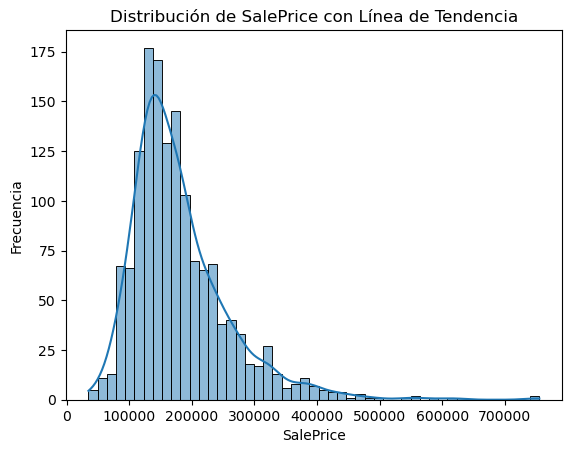

In [153]:
# Histograma de 'saleprice'
sns.histplot(df_train['SalePrice'], kde=True)

# Personaliza el gráfico
plt.title('Distribución de SalePrice con Línea de Tendencia')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()


In [154]:
#Transformar las columnas de tipo 'object' a 'category'
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        df_train[column] = df_train[column].astype('category')


### 2. Exploración y preprocesamiento de datos:
  - Antes de aplicar las transformaciones, realiza un análisis de las variables con distribuciones asimétricas o que contengan outliers. Estos son buenos candidatos para transformaciones logarítmicas o polinómicas.
  - También identifica variables que estén en escalas diferentes para aplicar técnicas de normalización o estandarización.


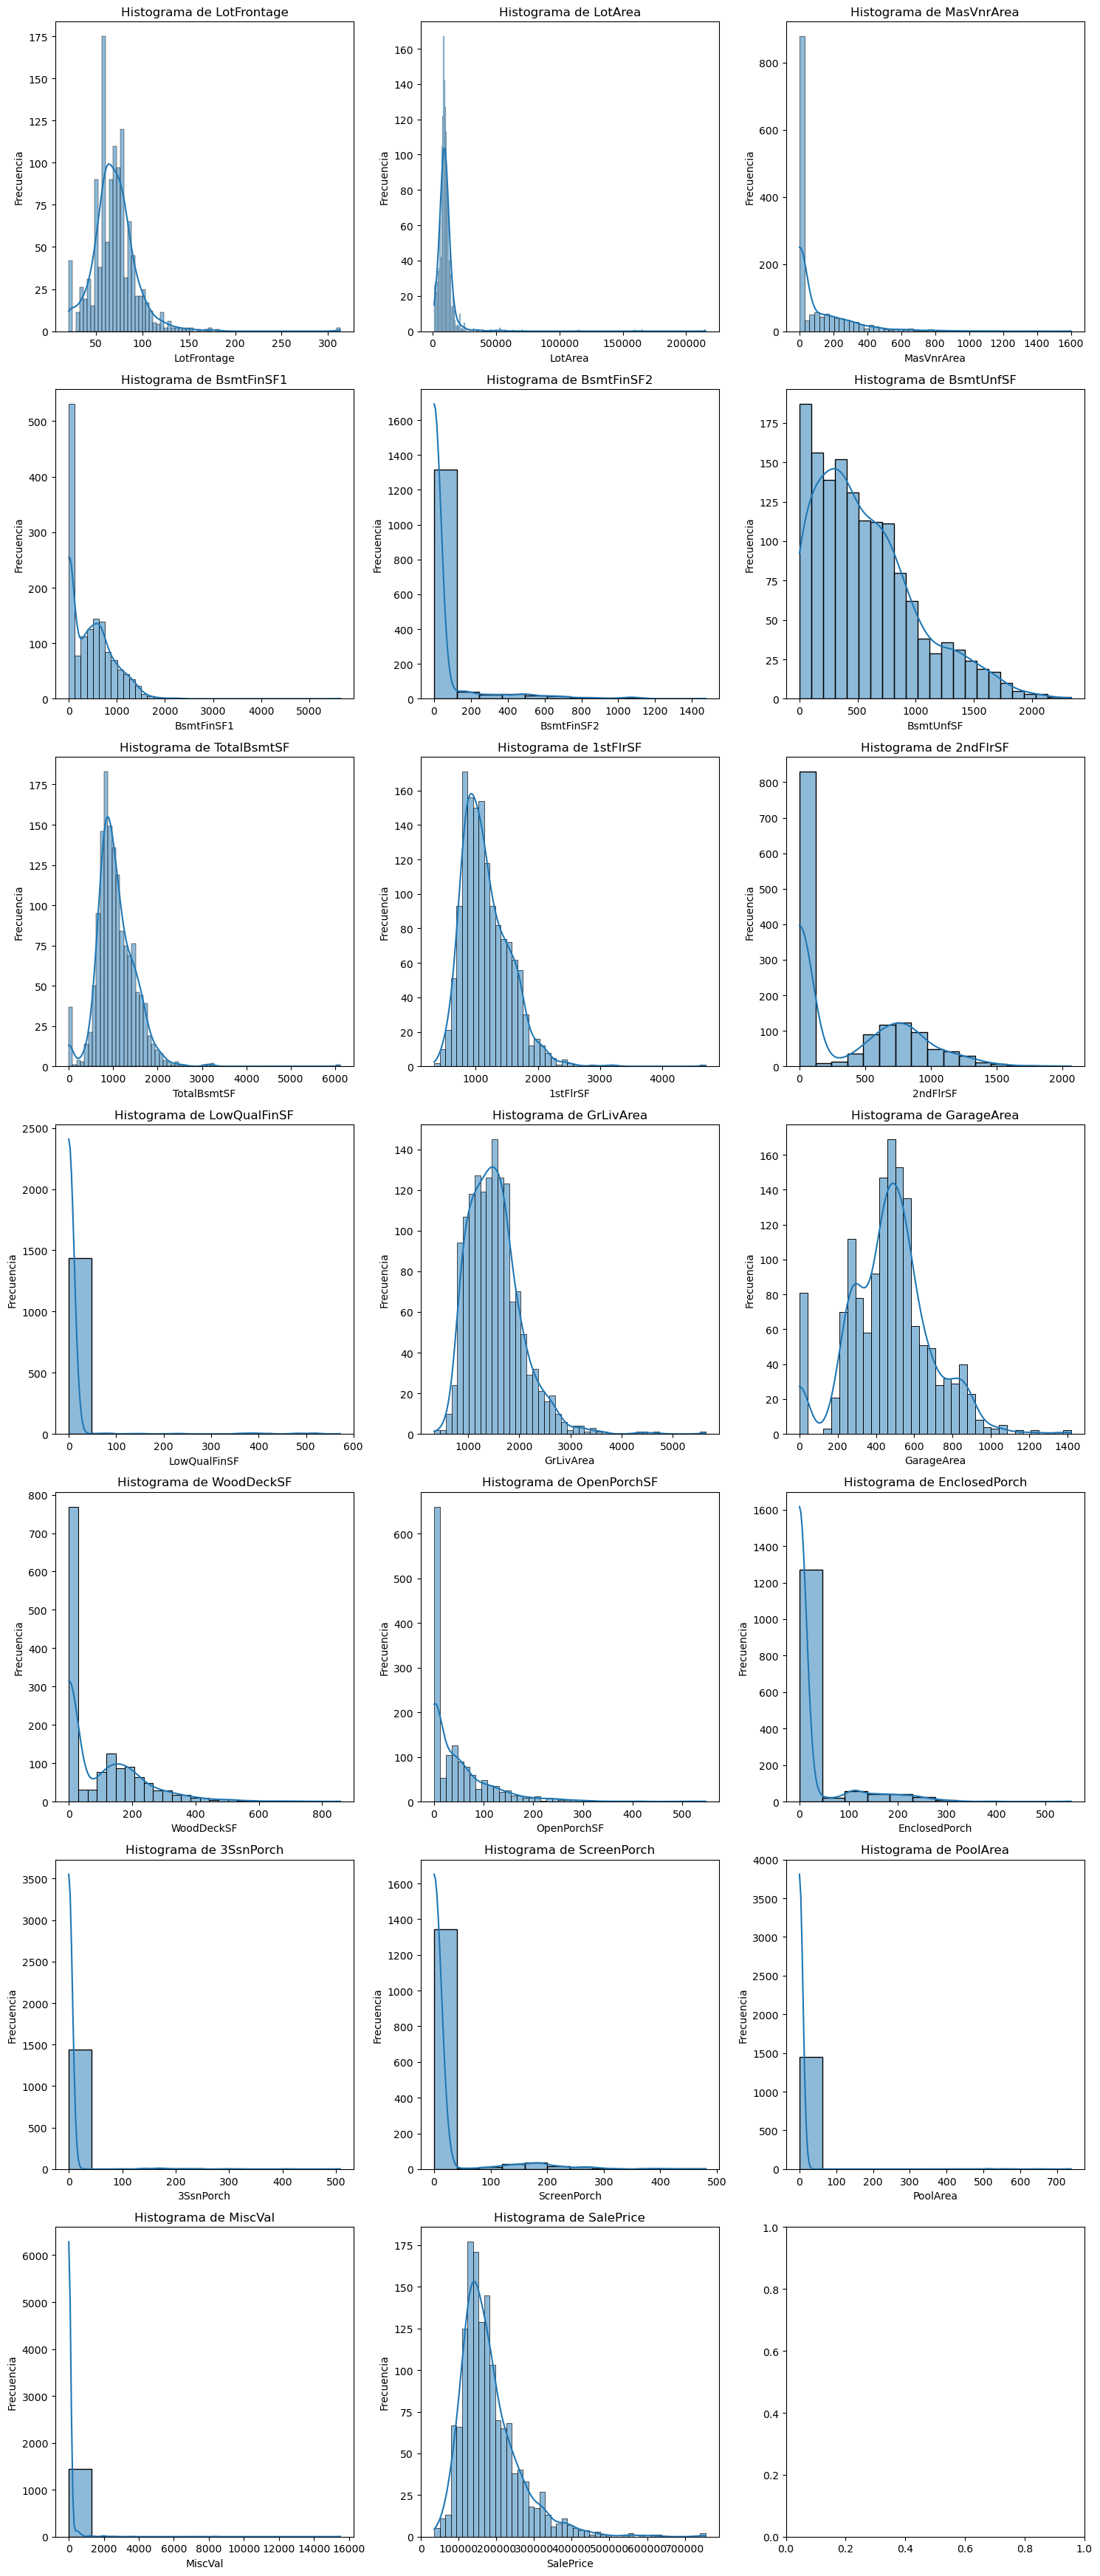

In [155]:
#sin valores clasificatorios, discretos u ordinales
# Lista de columnas a excluir
excluded_columns = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
                    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                    'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'Id', 'YearBuilt',
                    'YearRemodAdd', 'GarageYrBlt']

# Filtrar columnas numéricas que no están en la lista de exclusión
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
filtered_columns = [col for col in numeric_columns if col not in excluded_columns]

# Número de columnas para el grid
num_cols = 3

# Calcular el número de filas necesarias
num_rows = (len(filtered_columns) + num_cols - 1) // num_cols

# Crear subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Crear histogramas para cada columna filtrada
for i, col in enumerate(filtered_columns):
    sns.histplot(df_train[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Ajustar el layout
plt.tight_layout()
plt.show()



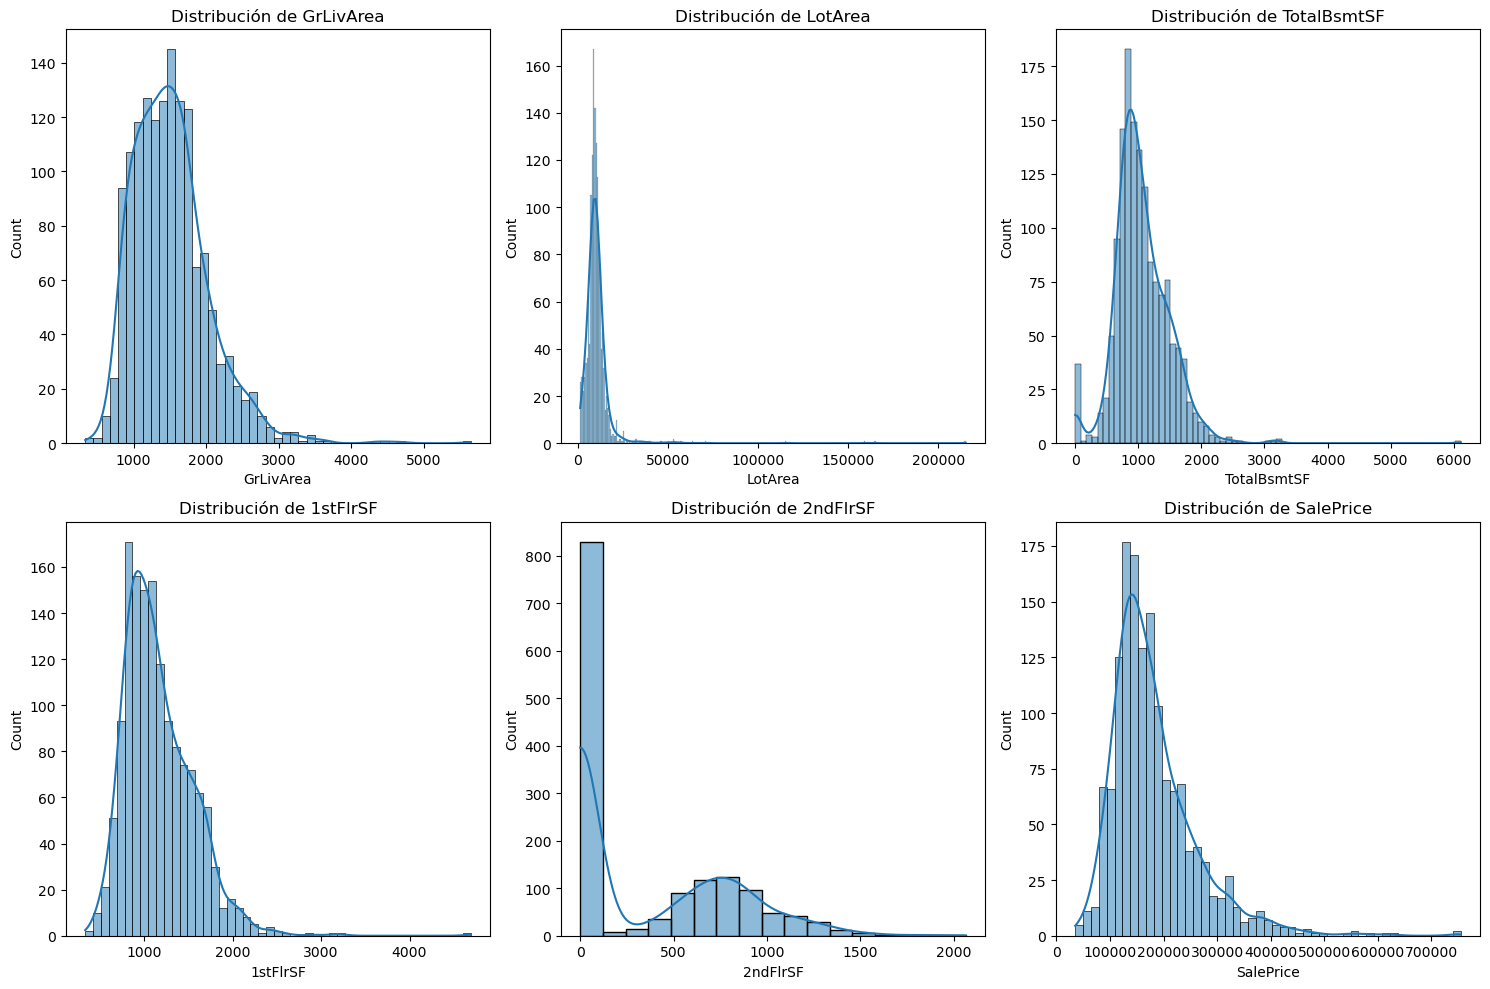

Asimetría de las variables:
GrLivArea       1.366560
LotArea        12.207688
TotalBsmtSF     1.524255
1stFlrSF        1.376757
2ndFlrSF        0.813030
SalePrice       1.882876
dtype: float64


In [156]:

# Variables relacionadas con el tamaño y la variable objetivo
variables = size_related + ['SalePrice']

# Visualizar histogramas de las variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_train[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

# Calcular la asimetría de las variables
skewness = df_train[variables].skew()
print("Asimetría de las variables:")
print(skewness)


### 3. Transformaciones de variables:
  - Aplica transformaciones logarítmicas a variables sesgadas como el «SalePrice» y otras variables numéricas que tengan una distribución sesgada.
  - Crea variables polinómicas a partir de las variables numéricas, como el tamaño total de la casa. Por ejemplo, agrega el cuadrado o el cubo de estas variables como nuevas características para capturar posibles relaciones no lineales.
  - Estandariza las variables numéricas para que todas tengan la misma escala, lo cual es útil cuando se entrenan modelos de regresión o algoritmos basados en distancia como KNN.


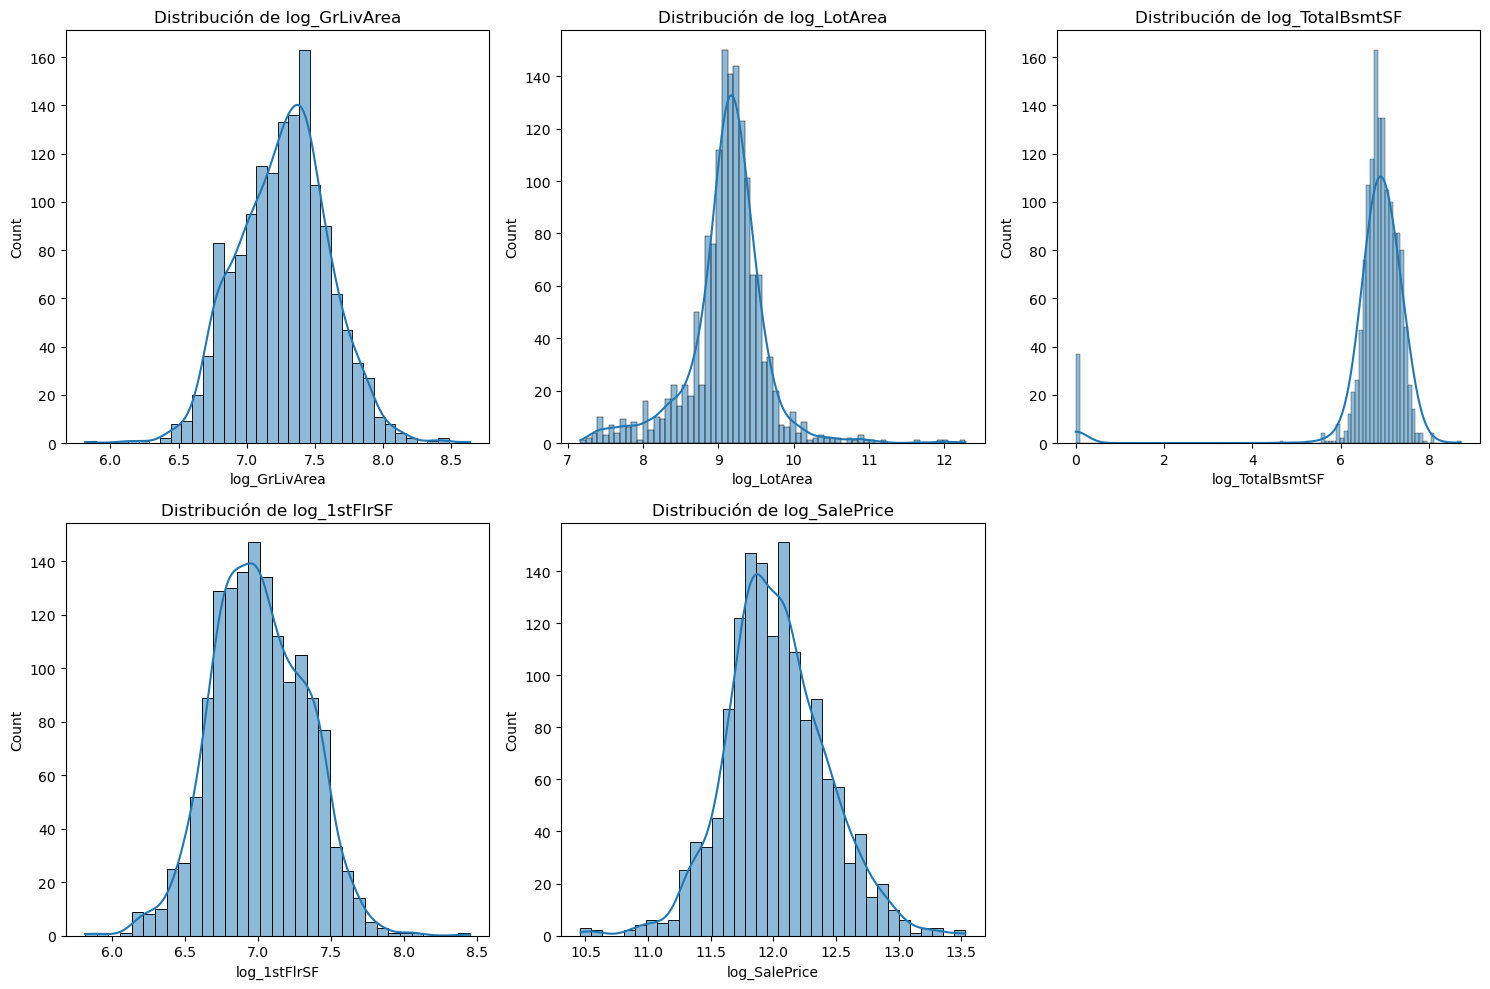

In [157]:
# Aplicar transformación logarítmica a las variables sesgadas
for col in variables:
    if skewness[col] > 1 or skewness[col] < -1:
        df_train[f'log_{col}'] = np.log1p(df_train[col])  # Usamos log1p para evitar problemas con valores cero

# Verificar la distribución después de la transformación
plt.figure(figsize=(15, 10))
for i, col in enumerate([f'log_{c}' for c in variables if f'log_{c}' in df_train.columns], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_train[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

In [158]:
# Crear variables polinómicas para las variables relacionadas con el tamaño
for col in size_related:
    df_train[f'{col}_squared'] = df_train[col] ** 2  # Cuadrado
    df_train[f'{col}_cubed'] = df_train[col] ** 3    # Cubo

# Verificar las nuevas variables
print(df_train[['GrLivArea', 'GrLivArea_squared', 'GrLivArea_cubed']].head())

   GrLivArea  GrLivArea_squared  GrLivArea_cubed
0       1710            2924100       5000211000
1       1262            1592644       2009916728
2       1786            3189796       5696975656
3       1717            2948089       5061868813
4       2198            4831204      10618986392


In [159]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las variables numéricas (incluyendo las transformadas)
numeric_columns_all = size_related + [f'log_{c}' for c in variables if f'log_{c}' in df_train.columns] + \
                    [f'{c}_squared' for c in size_related] + [f'{c}_cubed' for c in size_related]

# Estandarizar las variables numéricas
scaler = StandardScaler()
df_train[numeric_columns_all] = scaler.fit_transform(df_train[numeric_columns_all])

# Verificar las variables estandarizadas
print(df_train[numeric_columns_all].head())

   GrLivArea   LotArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  log_GrLivArea  \
0   0.370333 -0.207142    -0.459303 -0.793434  1.161852       0.529194   
1  -0.482512 -0.091886     0.466465  0.257140 -0.795163      -0.381965   
2   0.515013  0.073480    -0.313369 -0.627826  1.189351       0.659631   
3   0.383659 -0.096897    -0.687324 -0.521734  0.937276       0.541448   
4   1.299326  0.375148     0.199680 -0.045611  1.617877       1.282295   

   log_LotArea  log_TotalBsmtSF  log_1stFlrSF  log_SalePrice  \
0    -0.133270         0.002513     -0.803645       0.560067   
1     0.113413         0.341114      0.418479       0.212763   
2     0.420049         0.065397     -0.576677       0.734046   
3     0.103317        -0.105819     -0.439421      -0.437383   
4     0.878431         0.256237      0.112127       1.014651   

   GrLivArea_squared  LotArea_squared  TotalBsmtSF_squared  1stFlrSF_squared  \
0           0.170359        -0.086370            -0.412074         -0.661531   
1         

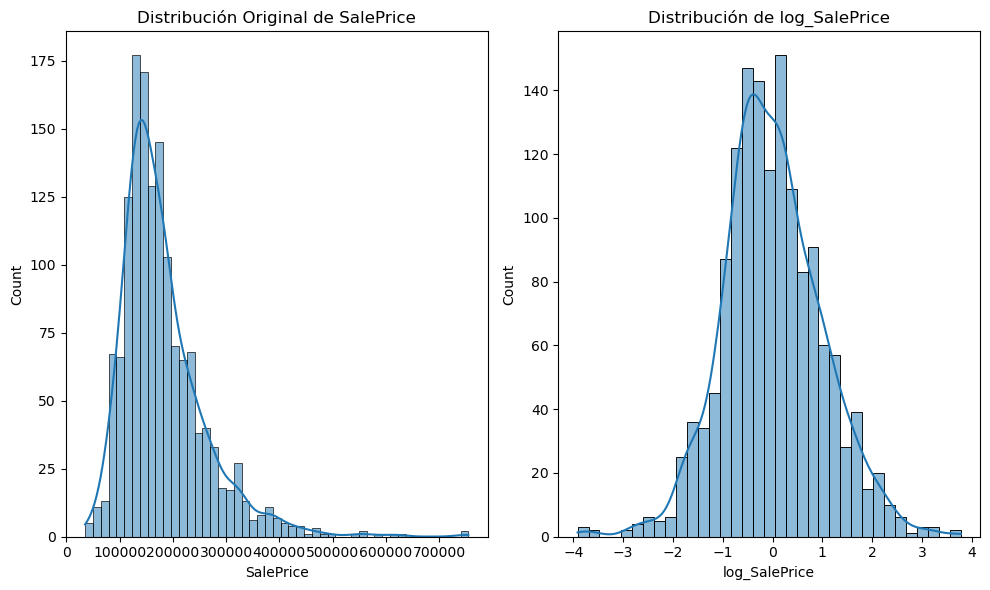

In [160]:
# Comparar distribución antes y después de la transformación logarítmica
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_train['SalePrice'], kde=True)
plt.title('Distribución Original de SalePrice')
plt.subplot(1, 2, 2)
sns.histplot(df_train['log_SalePrice'], kde=True)
plt.title('Distribución de log_SalePrice')
plt.tight_layout()
plt.show()


### 4. Evaluación de las transformaciones:
  - Aplica un modelo de regresión antes y después de las transformaciones para evaluar su impacto en el rendimiento del modelo.
  - Compara métricas como el RMSE (Root Mean Squared Error) y el R-squared para ver si las transformaciones logarítmicas y polinómicas han mejorado la predicción del precio de las casas.


In [161]:
# Convertir variables categóricas a tipo object
for col in qual_related:
    if df_train[col].dtype.name == 'category':
        df_train[col] = df_train[col].astype('object')

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# Definir las variables independientes (X) y dependiente (y)
X = df_train[size_related + qual_related]  # Variables originales
y = df_train['SalePrice']  # Variable objetivo

# Crear el OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Aplicar OneHotEncoder a las variables categóricas
X_cat_encoded = encoder.fit_transform(X[qual_related])

# Convertir el resultado a un DataFrame
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=encoder.get_feature_names_out(qual_related))

# Combinar con las variables numéricas
X_encoded = pd.concat([X[size_related], X_cat_encoded_df], axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print("Métricas sin transformaciones:")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
print(f"MAE: {mae}")

Métricas sin transformaciones:
RMSE: 35597.621102383855
R-squared: 0.8347931243182953
MAE: 22436.378047646187


In [166]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.impute import SimpleImputer


# Definir las columnas numéricas y categóricas
numeric_columns = size_related  # Columnas numéricas originales
categorical_columns = []  # No hay columnas categóricas originales (ya están codificadas)

# Pipeline para variables numéricas: transformaciones logarítmicas, polinómicas y estandarización
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes
    ('log', FunctionTransformer(np.log1p)),  # Transformación logarítmica
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Variables polinómicas
    ('scaler', StandardScaler())  # Estandarización
])

# No necesitamos un transformer para columnas categóricas (ya están codificadas)
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_columns)
    # No incluimos 'cat' porque las columnas categóricas ya están codificadas
])

# Pipeline completo con preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Entrenar el modelo con transformaciones
pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_transformed = pipeline.predict(X_test)


c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:379: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


ValueError: Input X contains NaN.
PolynomialFeatures does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Verificar valores faltantes en X_test
print("Valores faltantes en X_test:")
print(X_test.isnull().sum())


### 5. Interpretación de los resultados:
  - Analiza cuáles de las transformaciones aplicadas tuvieron un mayor impacto en la mejora del modelo. Discute cómo las transformaciones logarítmicas ayudan a manejar el sesgo en los datos y cómo las variables polinómicas capturan relaciones más complejas.
  - Reflexiona sobre la importancia de transformar variables antes de aplicar modelos de machine learning.





### Análisis de Resultados:

  - El análisis debe centrarse en cómo las diferentes transformaciones afectaron la distribución de las variables y cómo esto influyó en la precisión del modelo predictivo. Discute las ventajas y desventajas de las transformaciones aplicadas y su relevancia en problemas de regresión.